## Project Name : Stroke Prediction

The main aim of this project is to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status.

### Dataset  link
https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

## All the Lifecycle In A Data Science Projects
1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Model Deployment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objs as go

****[!pip install dataprep](http://)[](http://)


In [4]:
from dataprep.eda import *


In [18]:
df = pd.read_csv('../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')


In [19]:
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [20]:
df.columns


Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [21]:
df.select_dtypes(exclude=['int64','float64']).columns


Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [22]:
df.gender.replace({'Male': 1, 'Female': 0}, inplace=True)

df.ever_married.replace({'No': 0, 'Yes': 1}, inplace=True)

df.work_type.replace({'Private': 0, 'Self-employed': 1, 'children': 2,'Govt_job':3,'Never_worked':4}, inplace=True)

df.Residence_type.replace({'Urban': 0, 'Rural': 1}, inplace=True)

df.smoking_status.replace({'never smoked': 0, 'Unknown': 1,'formerly smoked':2,'smokes':3}, inplace=True)



In [23]:
df['gender']=pd.get_dummies(df['gender'])

  0%|          | 0/1617 [00:00<?, ?it/s]

DataPrep Report
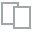
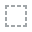
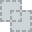
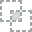
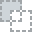
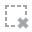
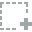
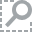
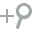
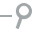
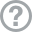
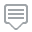
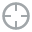
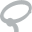
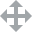
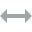
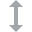
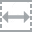
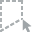
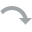
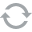
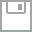
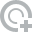
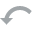
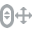
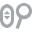
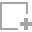
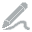
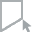
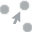
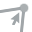
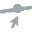

In [28]:
create_report(df)


In [29]:
df.head()

gender   age  hypertension  heart_disease  ever_married  work_type  \
0       0  67.0             0              1             1          0   
1       1  61.0             0              0             1          1   
2       0  80.0             0              1             1          0   
3       1  49.0             0              0             1          0   
4       1  79.0             1              0             1          1   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               0             228.69  36.6               2       1  
1               1             202.21   NaN               0       1  
2               1             105.92  32.5               0       1  
3               0             171.23  34.4               3       1  
4               1             174.12  24.0               0       1

In [30]:
df=df.drop(columns='id',axis=1)


KeyError: "['id'] not found in axis"

In [31]:
df.head()

gender   age  hypertension  heart_disease  ever_married  work_type  \
0       0  67.0             0              1             1          0   
1       1  61.0             0              0             1          1   
2       0  80.0             0              1             1          0   
3       1  49.0             0              0             1          0   
4       1  79.0             1              0             1          1   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               0             228.69  36.6               2       1  
1               1             202.21   NaN               0       1  
2               1             105.92  32.5               0       1  
3               0             171.23  34.4               3       1  
4               1             174.12  24.0               0       1

In [32]:
df.fillna(df.mode())

gender   age  hypertension  heart_disease  ever_married  work_type  \
0          0  67.0             0              1             1          0   
1          1  61.0             0              0             1          1   
2          0  80.0             0              1             1          0   
3          1  49.0             0              0             1          0   
4          1  79.0             1              0             1          1   
...      ...   ...           ...            ...           ...        ...   
5105       1  80.0             1              0             1          0   
5106       1  81.0             0              0             1          1   
5107       1  35.0             0              0             1          1   
5108       0  51.0             0              0             1          0   
5109       1  44.0             0              0             1          3   

      Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0                  0             228.69  36.6               2       1  
1                  1             202.21   NaN               0       1  
2                  1             105.92  32.5               0       1  
3                  0             171.23  34.4               3       1  
4                  1             174.12  24.0               0       1  
...              ...                ...   ...             ...     ...  
5105               0              83.75   NaN               0       0  
5106               0             125.20  40.0               0       0  
5107               1              82.99  30.6               0       0  
5108               1             166.29  25.6               2       0  
5109               0              85.28  26.2               1       0  

[5110 rows x 11 columns]

In [ ]:
df=df.dropna()

In [ ]:
trace0 = go.Box(
    name = "gender",
    y = df["gender"]
)

trace1 = go.Box(
    name = "age",
    y = df["age"]
)

trace2 = go.Box(
    name = "hypertension",
    y = df["hypertension"]
)

trace3 = go.Box(
    name = "heart_disease",
    y = df["heart_disease"] 
)

trace4 = go.Box(
    name = "ever_married",
    y = df["ever_married"]
)

trace5 = go.Box(
    name = "work_type",
    y = df["work_type"]
)

trace6 = go.Box(
    name = "Residence_type",
    y = df["Residence_type"]
)

trace7 = go.Box(
    name = "avg_glucose_level",
    y = df["avg_glucose_level"]
)

trace8 = go.Box(
    name = "bmi",
    y = df["bmi"]
)

trace9 = go.Box(
    name = "smoking_status",
    y = df["smoking_status"]
)

trace10 = go.Box(
    name = "stroke",
    y = df["stroke"]
)
data = [trace0, trace1, trace2 , trace3 , trace4 , trace5 ,trace6, trace7, trace8 , trace9 , trace10  ]
plotly.offline.iplot(data)

In [ ]:
plot_correlation(df, "stroke")


In [ ]:
fig = px.scatter_matrix(df, dimensions=['gender', 'age', 'hypertension', 'stroke'])
fig.show()

In [ ]:
fig = px.scatter_matrix(df, dimensions=[ 'heart_disease', 'ever_married',
       'work_type', 'stroke'])
fig.show()

In [ ]:
fig = px.scatter_matrix(df, dimensions=['Residence_type', 'avg_glucose_level', 'bmi',
                                        'stroke'])
fig.show()

In [ ]:
fig = px.scatter_matrix(df, dimensions=['Residence_type', 'avg_glucose_level', 'bmi',
                                        'smoking_status','stroke'])
fig.show()

In [ ]:
df[df.isnull().any(axis=1)]

In [ ]:
X = df.drop(columns=["stroke"])
y = df["stroke"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=10).fit(X_train,y_train)
prediction=rf_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

The main parameters used by a Random Forest Classifier are:

- criterion = the function used to evaluate the quality of a split.
- max_depth = maximum number of levels allowed in each tree.
- max_features = maximum number of features considered when splitting a node.
- min_samples_leaf = minimum number of samples which can be stored in a tree leaf.
- min_samples_split = minimum number of samples necessary in a node to cause node splitting.
- n_estimators = number of trees in the ensamble.

In [ ]:
### Manual Hyperparameter Tuning
model=RandomForestClassifier(n_estimators=300,criterion='entropy',
                             max_features='sqrt',min_samples_leaf=10,random_state=100).fit(X_train,y_train)
predictions=model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

###  Genetic Algorithms¶
Genetic Algorithms tries to apply natural selection mechanisms to Machine Learning contexts.

Let's immagine we create a population of N Machine Learning models with some predifined Hyperparameters. We can then calculate the accuracy of each model and decide to keep just half of the models (the ones that performs best). We can now generate some offsprings having similar Hyperparameters to the ones of the best models so that go get again a population of N models. At this point we can again caltulate the accuracy of each model and repeate the cycle for a defined number of generations. In this way, just the best models will survive at the end of the process.

In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
param = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(param)

In [ ]:
from tpot import TPOTClassifier


tpot_classifier = TPOTClassifier(generations= 5, population_size= 24, offspring_size= 12,
                                 verbosity= 2, early_stop= 12,
                                 config_dict={'sklearn.ensemble.RandomForestClassifier': param}, 
                                 cv = 4, scoring = 'accuracy')
tpot_classifier.fit(X_train,y_train)

In [ ]:
accuracy = tpot_classifier.score(X_test, y_test)
print(accuracy)

### Optimize hyperparameters of the model using Optuna
The hyperparameters of the above algorithm are n_estimators and max_depth for which we can try different values to see if the model accuracy can be improved. The objective function is modified to accept a trial object. This trial has several methods for sampling hyperparameters. We create a study to run the hyperparameter optimization and finally read the best hyperparameters.

In [ ]:
import optuna
import sklearn.svm
def objective(trial):

    classifier = trial.suggest_categorical('classifier', ['RandomForest', 'SVC'])
    
    if classifier == 'RandomForest':
        n_estimators = trial.suggest_int('n_estimators', 200, 2000,10)
        max_depth = int(trial.suggest_float('max_depth', 10, 100, log=True))

        clf = sklearn.ensemble.RandomForestClassifier(
            n_estimators=n_estimators, max_depth=max_depth)
    else:
        c = trial.suggest_float('svc_c', 1e-10, 1e10, log=True)
        
        clf = sklearn.svm.SVC(C=c, gamma='auto')

    return sklearn.model_selection.cross_val_score(
        clf,X_train,y_train, n_jobs=-1, cv=3).mean()


In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

In [ ]:
trial

In [ ]:
study.best_params

In [ ]:
rf=RandomForestClassifier(n_estimators=330,max_depth=30)
rf.fit(X_train,y_train)

In [ ]:
y_pred=rf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))